In [1]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

font_dirs = ['./font'] # 폰트경로
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
%config InlineBackend.figure_format = 'retina'

In [2]:
from glob import glob
data_path = glob('./data/*.csv')

In [3]:
data_path

['./data/2014_공공시설운영 현황.csv',
 './data/2017_공공시설운영 현황.csv',
 './data/2019_공공시설운영 현황.csv',
 './data/SPOTFIRE_TEMPLATE_2_2.csv',
 './data/2018_공공시설운영 현황.csv',
 './data/2016_공공시설운영 현황.csv',
 './data/2015_공공시설운영 현황.csv']

In [4]:
with open('./data/2019_공공시설운영 현황.csv','r',encoding='CP949') as f:
    data = f.readlines()


In [5]:
len(data)

865

In [6]:
columns=[i.strip() for i in data[0].split(';')]

In [7]:
df = pd.DataFrame([],columns=columns)

In [8]:
df

,순번,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,자산가치 변동현황,비용,수익,순수익


In [9]:
new_columns = df.columns.tolist() 
new_columns = new_columns[:12] + [i.strip() for i in data[1].split(';')] + new_columns[17:]
df.columns = new_columns

In [10]:
for j in range(2,len(data)):
    df.loc[len(df)] = [i.strip() for i in data[j].split(';')]
df = df.set_index('순번', drop=True)

In [12]:
df = df.astype({i: 'str' for i in df.columns[6:]})

In [13]:
def replace_comma(d):
    return str(d).replace(',','')


In [14]:
df=df.applymap(replace_comma)
df = df.astype({i: 'int' for i in df.columns[6:]})
df = df.astype({'건립일': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 1 to 863
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치단체      863 non-null    object
 1   시설유형      863 non-null    object
 2   시설구분      863 non-null    object
 3   시설명       863 non-null    object
 4   건립일       863 non-null    string
 5   운영방식      863 non-null    object
 6   건물면적(㎡)   863 non-null    int64 
 7   토지면적(㎡)   863 non-null    int64 
 8   관리인력      863 non-null    int64 
 9   연간이용인원    863 non-null    int64 
 10  건립비용      863 non-null    int64 
 11  취득가액      863 non-null    int64 
 12  감가상각액     863 non-null    int64 
 13  감가상각 누계액  863 non-null    int64 
 14  장부가액      863 non-null    int64 
 15  내용연수      863 non-null    int64 
 16  비용        863 non-null    int64 
 17  수익        863 non-null    int64 
 18  순수익       863 non-null    int64 
dtypes: int64(13), object(5), string(1)
memory usage: 134.8+ KB


In [15]:
import re
def fill_datetime(d):
    pattern = re.compile('[0-9]{4}[.][0-9]{2}[.][0-9]{2}')
    if pattern.match(d):
        return d
    else:
        return d+'01'
df['건립일']=df['건립일'].apply(fill_datetime)
df['건립일'] = pd.to_datetime(df['건립일'])


In [16]:
df

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익
순번,,,,,,,,,,,,,,,,,,,
1,서울본청,문화시설,박물관,서울도시건축전시관,2019-01-11,위탁,2988,1558,0,290895,28168,21047,526,526,20521,40,2232,60,-2172
2,서울본청,문화시설,박물관,서울역사박물관,1998-02-03,직영,20883,99728,259,1669855,34411,34411,341,14270,20140,80,14434,818,-13617
3,서울본청,문화시설,박물관,한성백제박물관,2011-12-31,직영,19423,14894,140,788020,79530,79530,2485,15906,63624,40,13101,242,-12858
4,서울본청,문화시설,문화예술회관,동대문디자인플라자,2013-11-20,위탁,86574,62108,40,11739138,421222,384332,10128,39991,344341,40,14692,15477,784
5,서울본청,문화시설,과학관,서울시립과학관,2016-06-30,직영,12330,25875,84,216986,42349,42349,2231,7354,34995,40,4807,308,-4499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,제주본청,체육시설,축구장,제주종합경기장 주경기장,1968-07-30,직영,11399,30327,1,147498,31491,31491,1903,23087,8403,40,853,28,-824
860,제주본청,체육시설,수영장,서귀포국민체육센터,2005-12-28,위탁,7837,7927,17,246013,12154,12154,191,3374,8781,60,1182,354,-828
861,제주본청,체육시설,기타체육시설,공천포전지훈련센터,2010-04-23,직영,5822,148462,3,50416,26800,26800,940,8401,16875,40,131,22,-110


array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

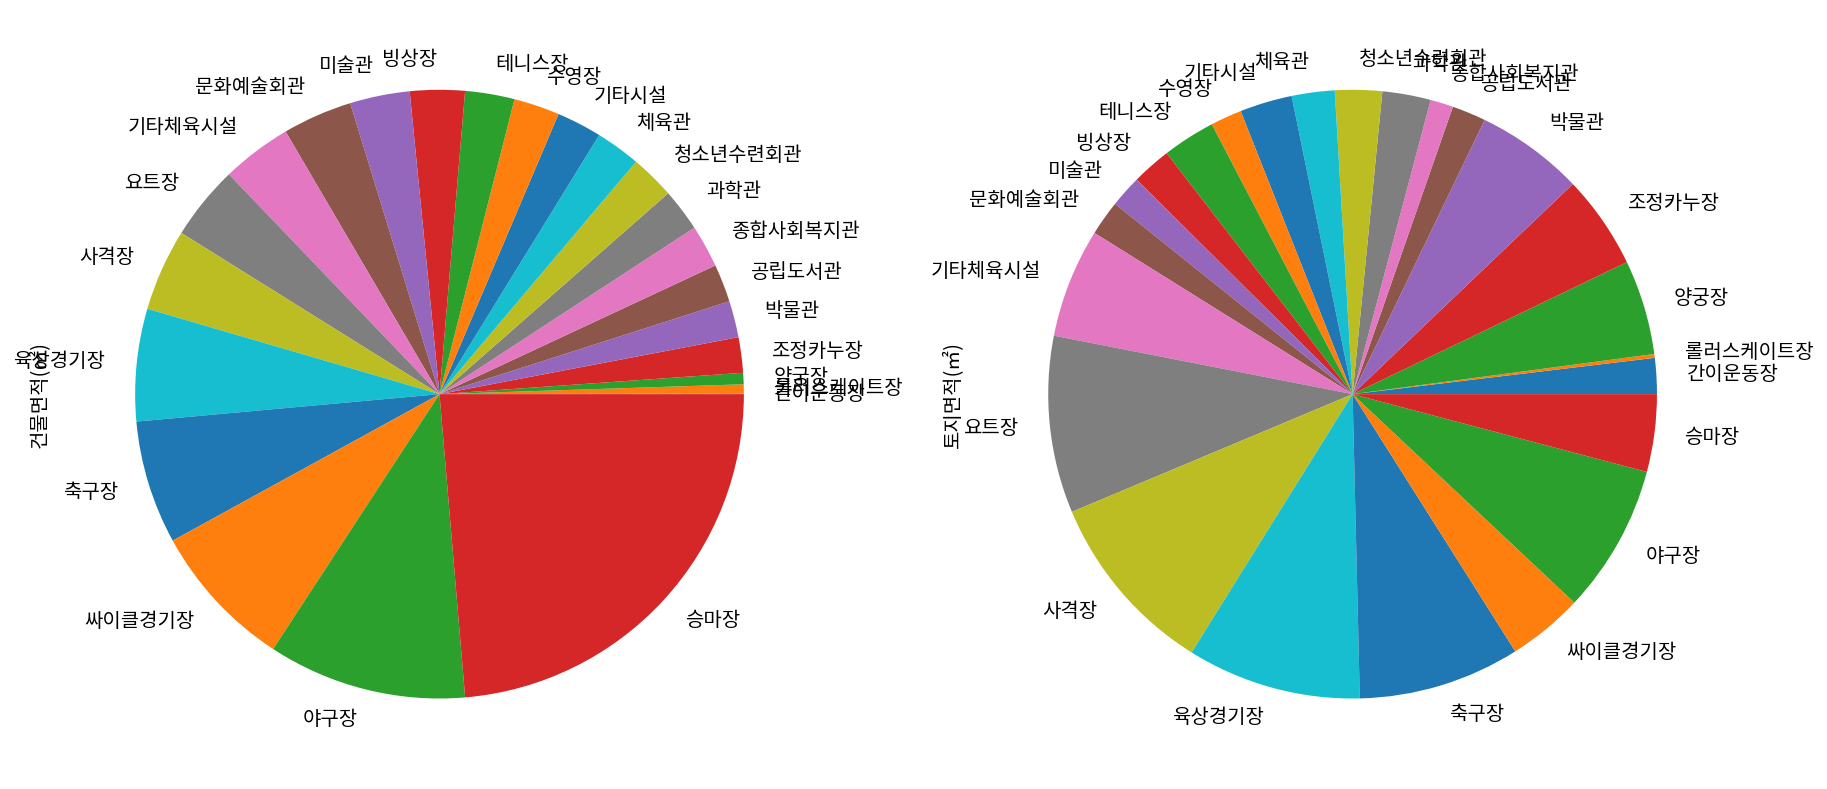

In [17]:
## 승마장, 싸이클경기장, 축구장 은 건물 면적이 넓지만 토지 면적은 적다 체육시설
## 사격장, 요트장, 야구장, 의 토지면적 넓음
grouped1 = df['건물면적(㎡)'].groupby(df['시설구분'])
grouped2 = df['토지면적(㎡)'].groupby(df['시설구분'])

pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(15,15), legend=False)

array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

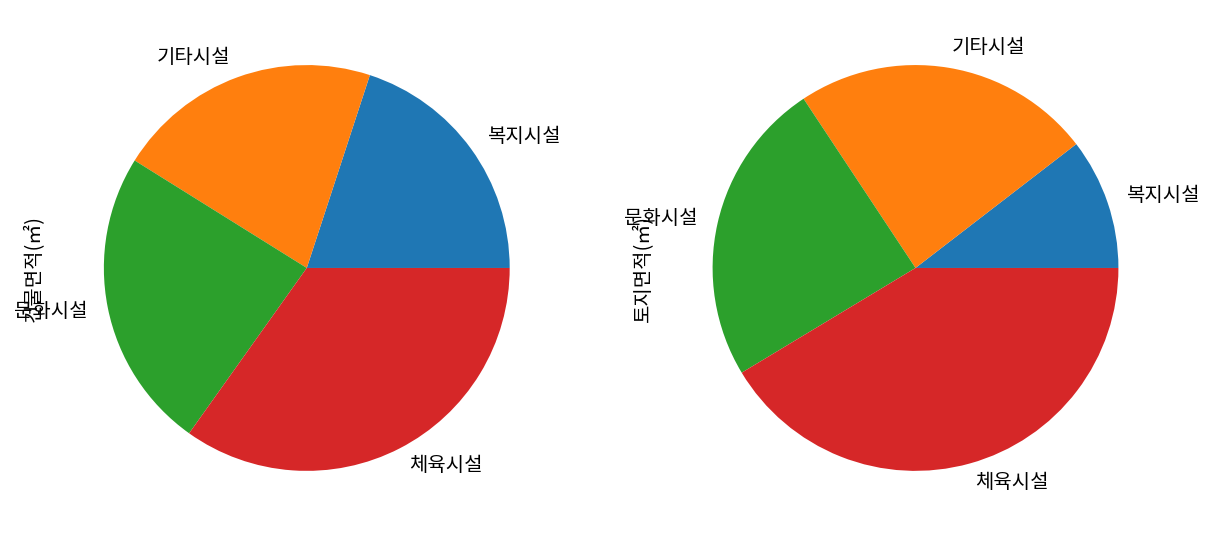

In [18]:
# 체육시설의 건물면적 대비 토지면적이 큼
# 복지시설의 토지면적은 적음
grouped1 = df['건물면적(㎡)'].groupby(df['시설유형'])
grouped2 = df['토지면적(㎡)'].groupby(df['시설유형'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(10,10),legend=False)

In [19]:
def grouped_sido(d):
    d = d['자치단체']
    return d[:2]
df['시도별'] = df.apply(grouped_sido, axis=1)

array([<AxesSubplot:ylabel='건물면적(㎡)'>, <AxesSubplot:ylabel='토지면적(㎡)'>],
      dtype=object)

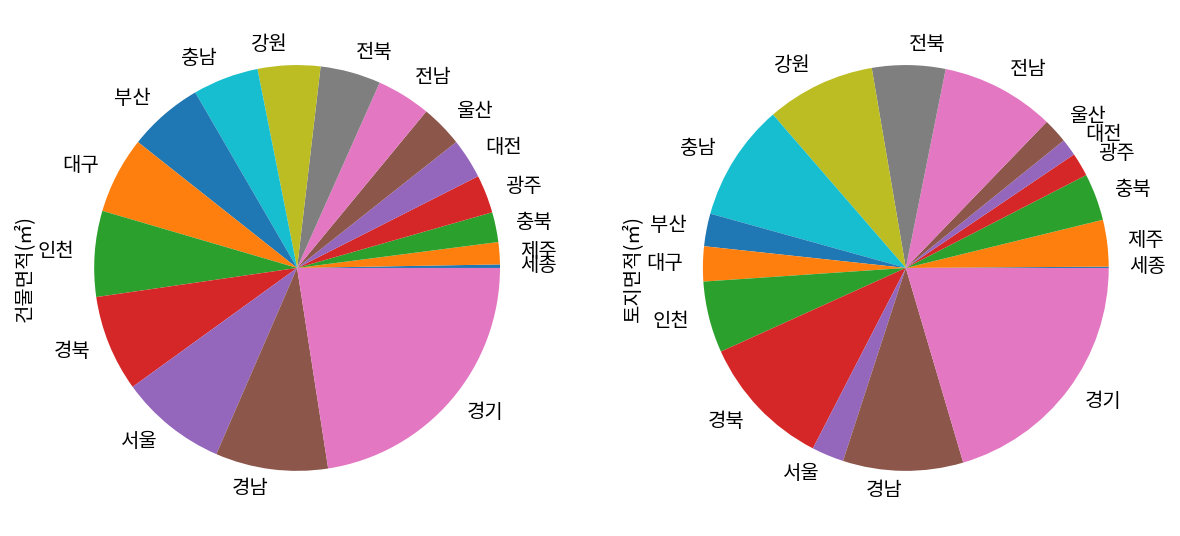

In [20]:
# 시도별 건물면적, 토지면적 합
# 경기는 둘째 치고, 부산, 대구의 토지면적이 건물면적대비 적은것과, 충남,강원,전남, 경북이 넓음
grouped1 = df['건물면적(㎡)'].groupby(df['시도별'])
grouped2 = df['토지면적(㎡)'].groupby(df['시도별'])
pd.concat([grouped1.sum().sort_values().to_frame(),
           grouped2.sum().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True,figsize=(10,10), legend=False)

array([<AxesSubplot:ylabel='관리인력'>], dtype=object)

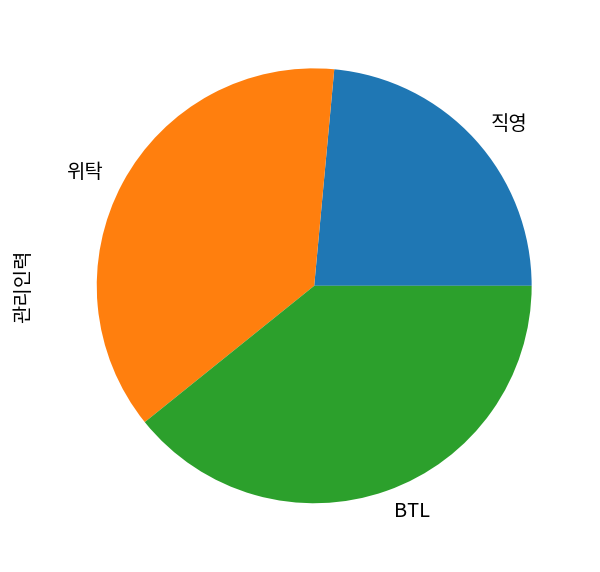

In [21]:
# 중위값
# 운영방식에 있어, 직영은 비용 절감을 위해 관리인력을 다른 운영방식 보다 적게 가져가려는 경향이 있음
grouped1 = df['관리인력'].groupby(df['운영방식'])
grouped1.median().sort_values().plot.pie(subplots=True,figsize=(5,5),legend=False)

<AxesSubplot:xlabel='시도별'>

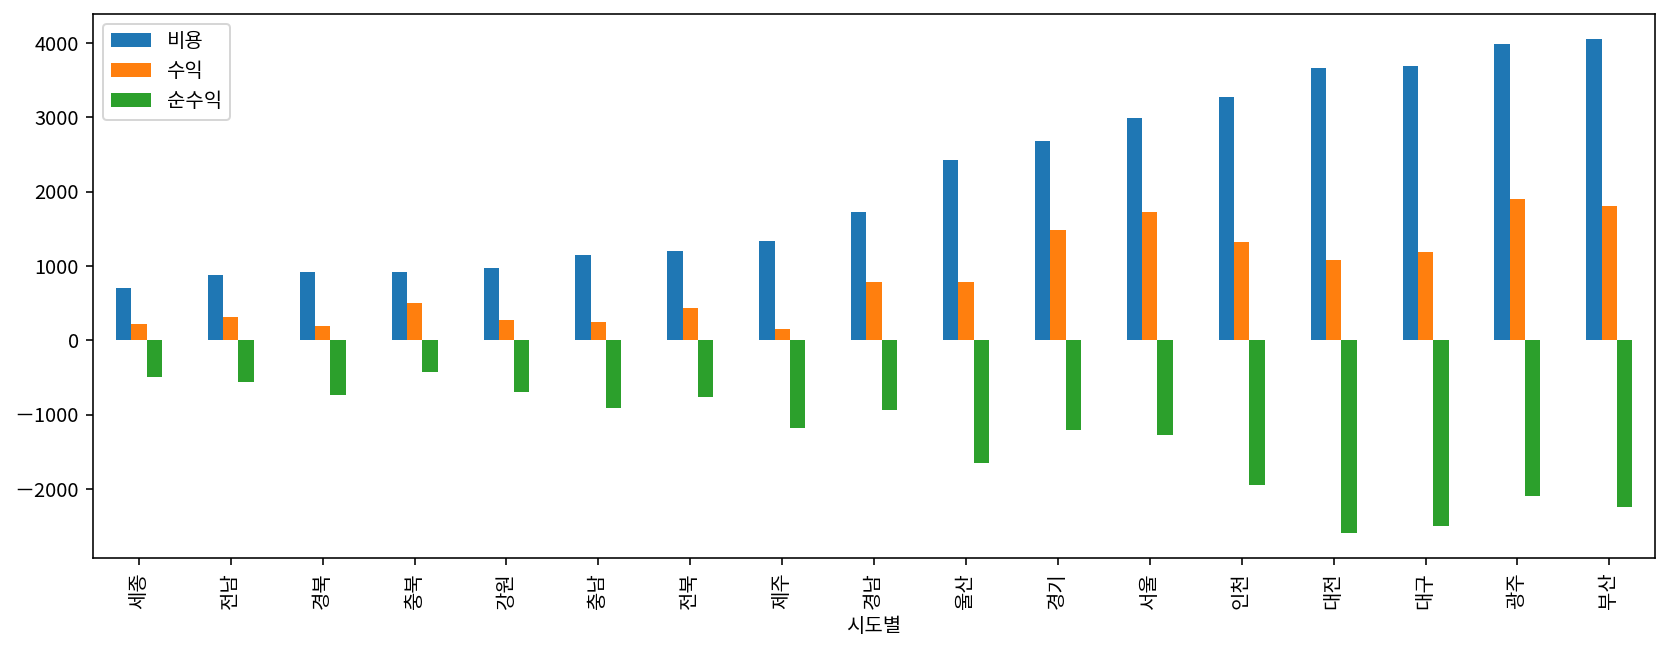

In [23]:
grouped1 = df['비용'].groupby(df['시도별'])
grouped2 = df['수익'].groupby(df['시도별'])
grouped3 = df['순수익'].groupby(df['시도별'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame(),
          grouped3.mean().sort_values().to_frame()], axis=1,)\
            .plot.bar(figsize=(14,5), legend=True)
# 전체 적인 평균은 순수익이 전부 음수임, 비용이 많이 듦

<AxesSubplot:xlabel='시도별'>

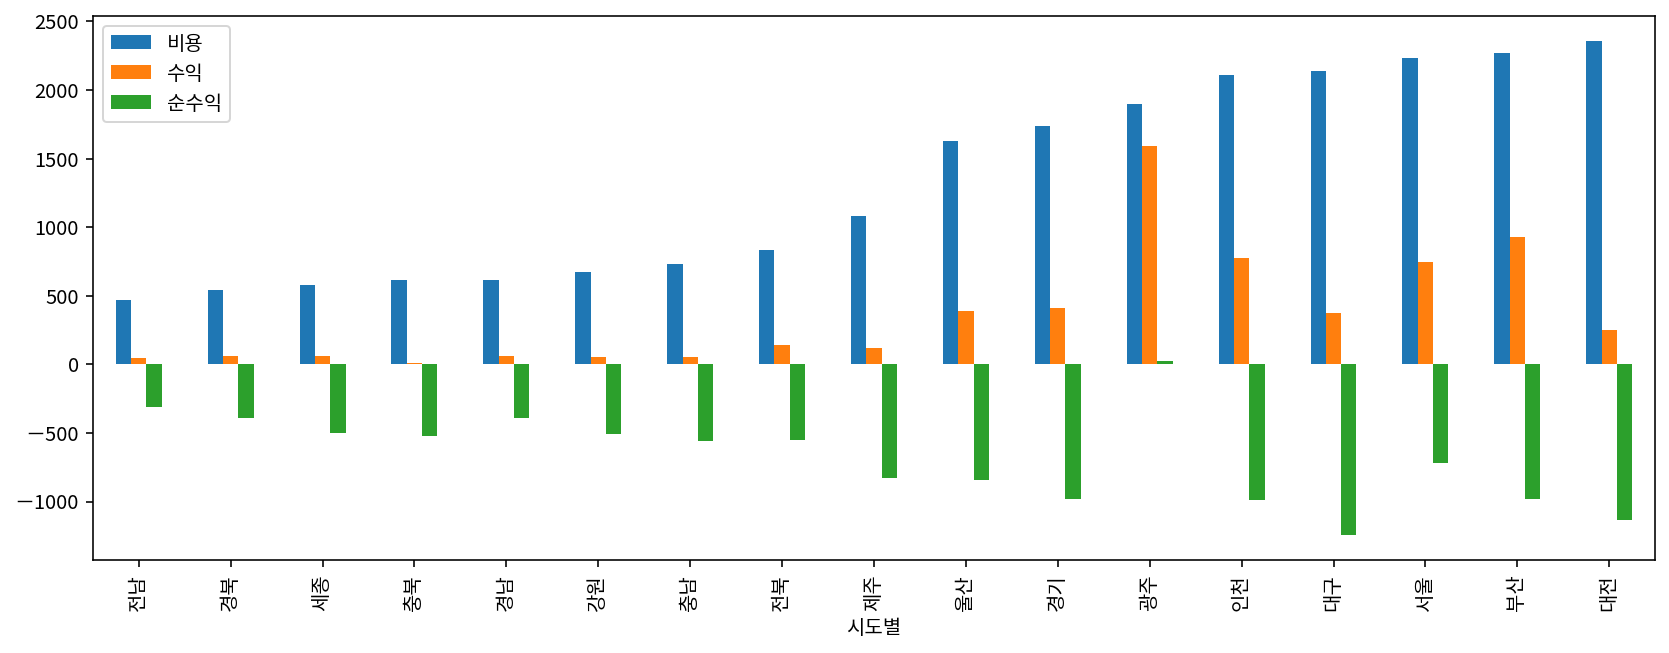

In [24]:
grouped1 = df['비용'].groupby(df['시도별'])
grouped2 = df['수익'].groupby(df['시도별'])
grouped3 = df['순수익'].groupby(df['시도별'])
pd.concat([grouped1.median().sort_values().to_frame(),
           grouped2.median().sort_values().to_frame(),
          grouped3.median().sort_values().to_frame()], axis=1,)\
            .plot.bar(figsize=(14,5), legend=True)
# 중위값에 광주의 수익이 확 높아짐 > 원인 확인

array([<AxesSubplot:ylabel='연간이용인원'>, <AxesSubplot:ylabel='관리인력'>],
      dtype=object)

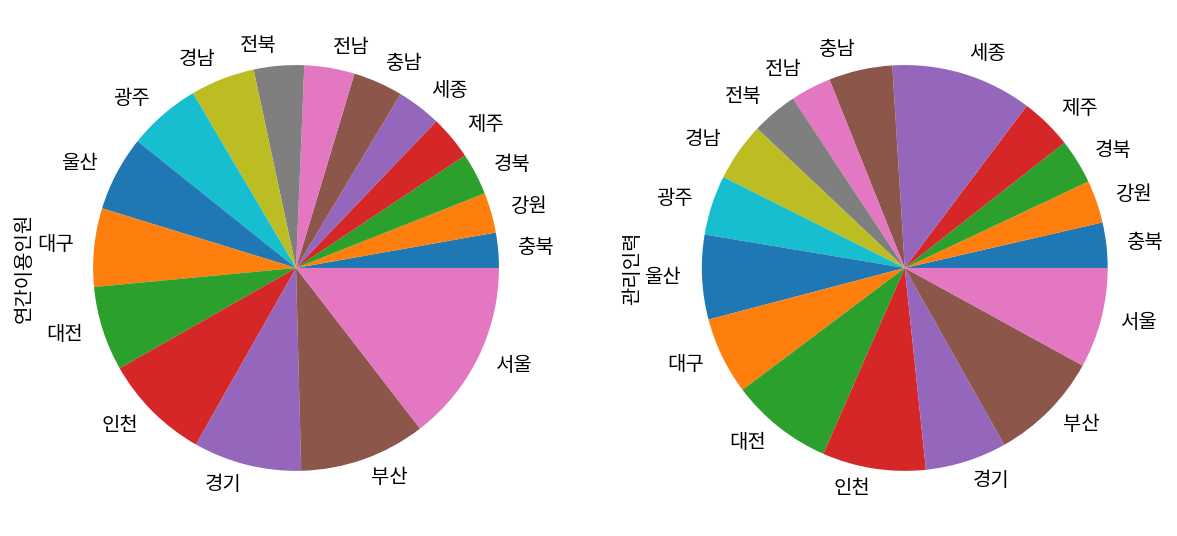

In [25]:
# 이용인원과 관리인력에 대한 분석
# 관리인력 대비 이용인원이 많은곳 > 수익이 날 수 도 있는 후보 지역, 서울, 경기 > 인구 많은쪽, 수익이 나기 어려울 수 있는 후보군 : 세종, 충남
grouped1 = df['연간이용인원'].groupby(df['시도별'])
grouped2 = df['관리인력'].groupby(df['시도별'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame()], axis=1,)\
            .plot.pie(subplots=True, figsize=(10,5), legend=False) 
# 세종, 서울

<AxesSubplot:xlabel='운영방식'>

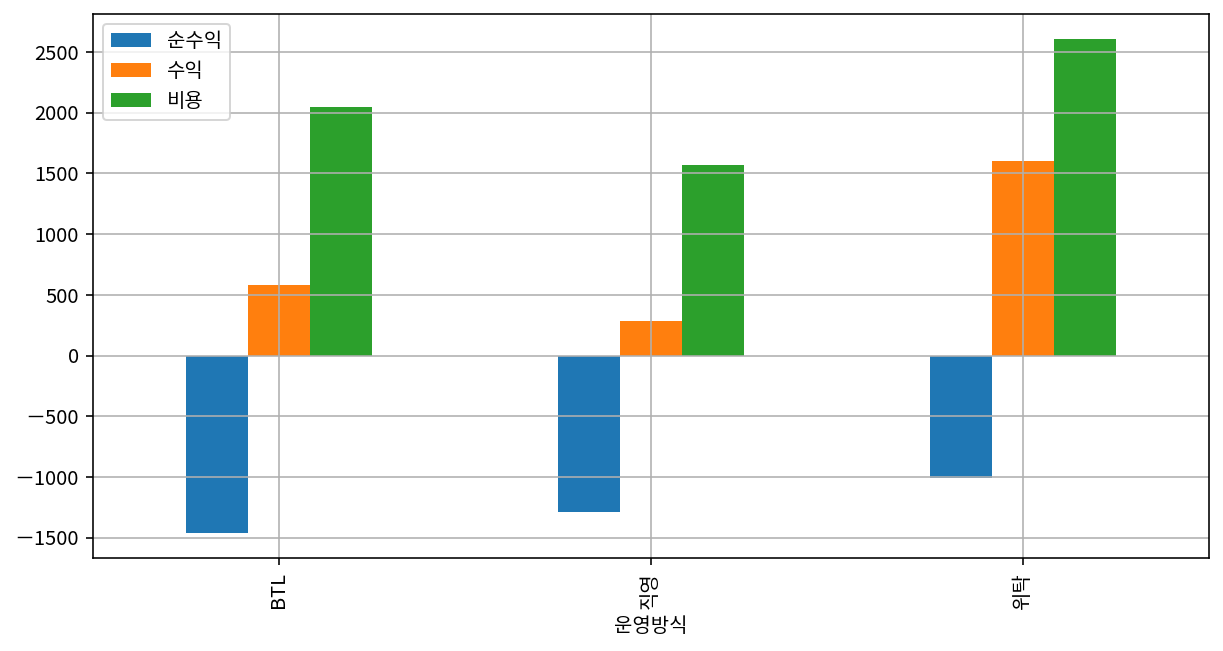

In [26]:
grouped1 = df['순수익'].groupby(df['운영방식'])
grouped2 = df['수익'].groupby(df['운영방식'])
grouped3 = df['비용'].groupby(df['운영방식'])
pd.concat([grouped1.mean().sort_values().to_frame(),
           grouped2.mean().sort_values().to_frame(),
          grouped3.mean().sort_values().to_frame()], axis=1,)\
            .plot.bar( figsize=(10,5), legend=True, grid=True) 
# 위탁의 비용이 높음, 비용에 대해 수익도 많이남, 홍보나 섭외 등의 마케팅 문제

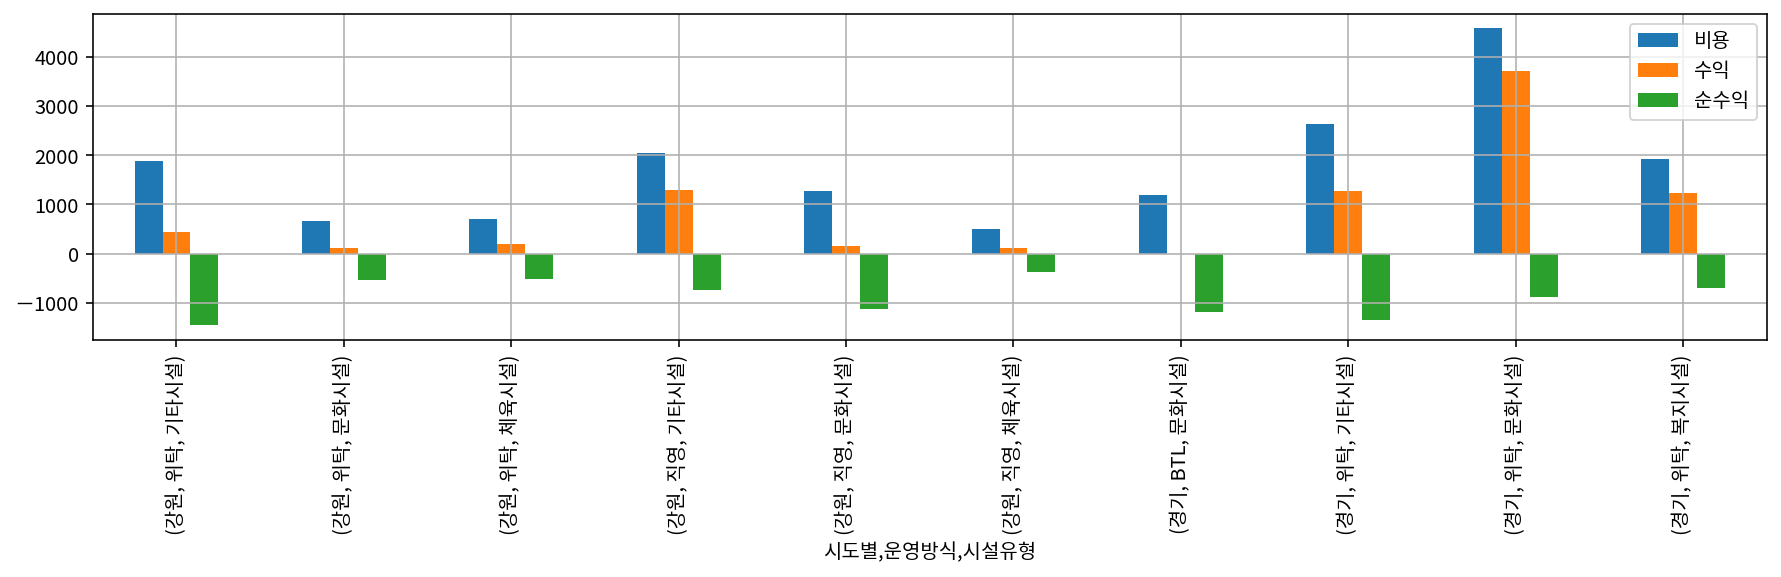

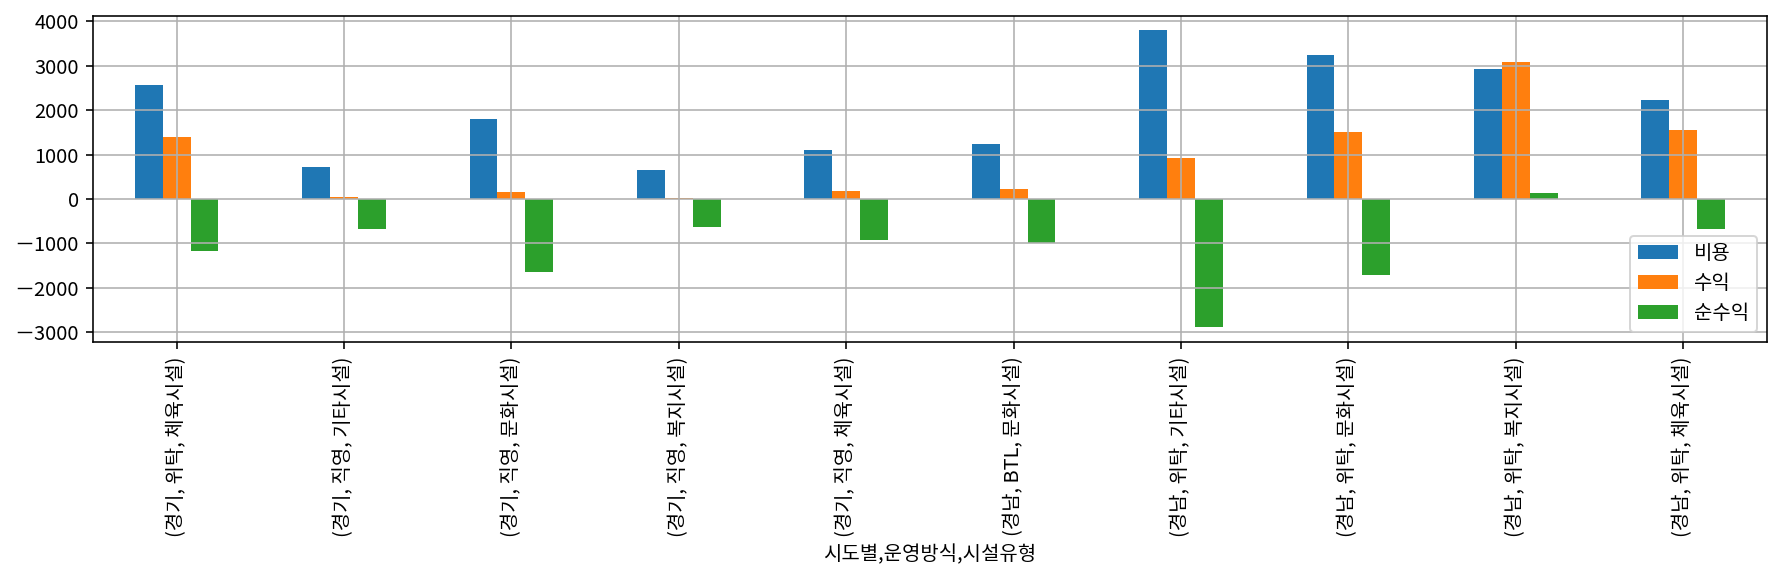

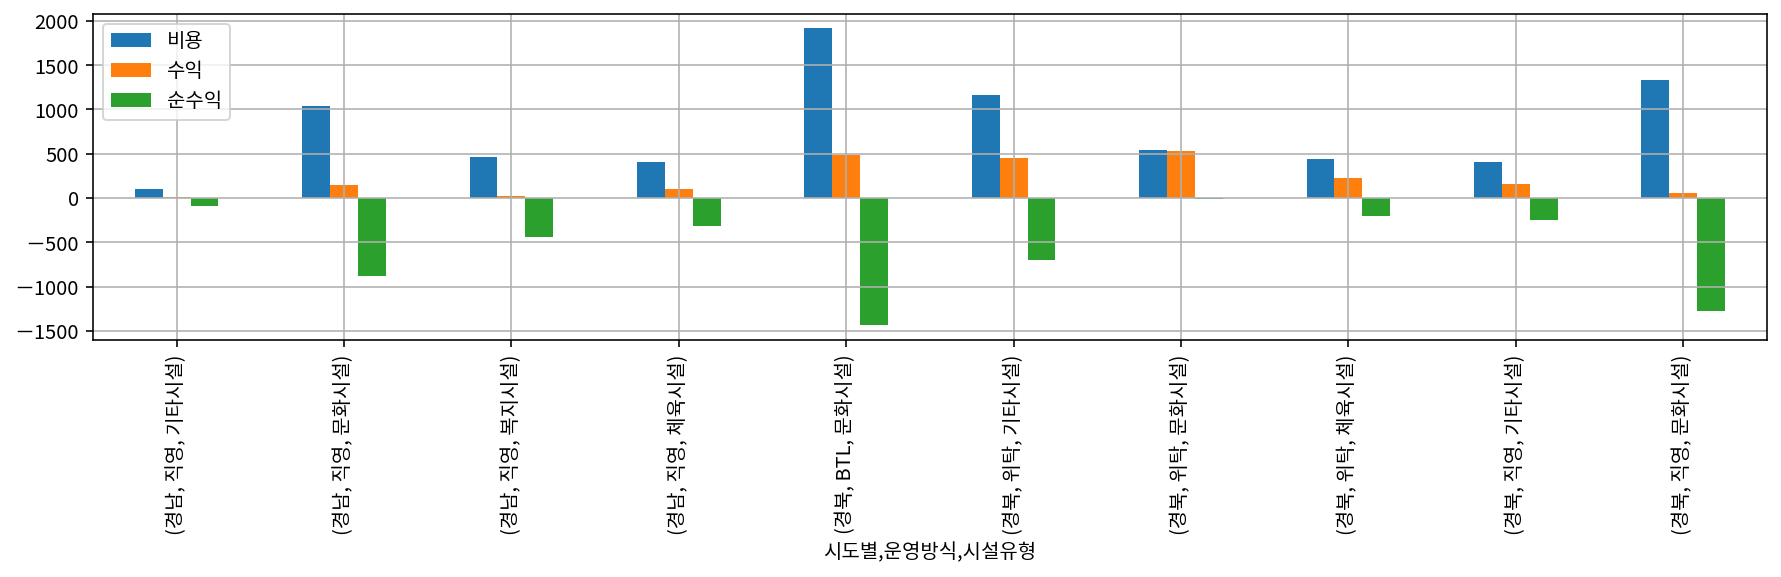

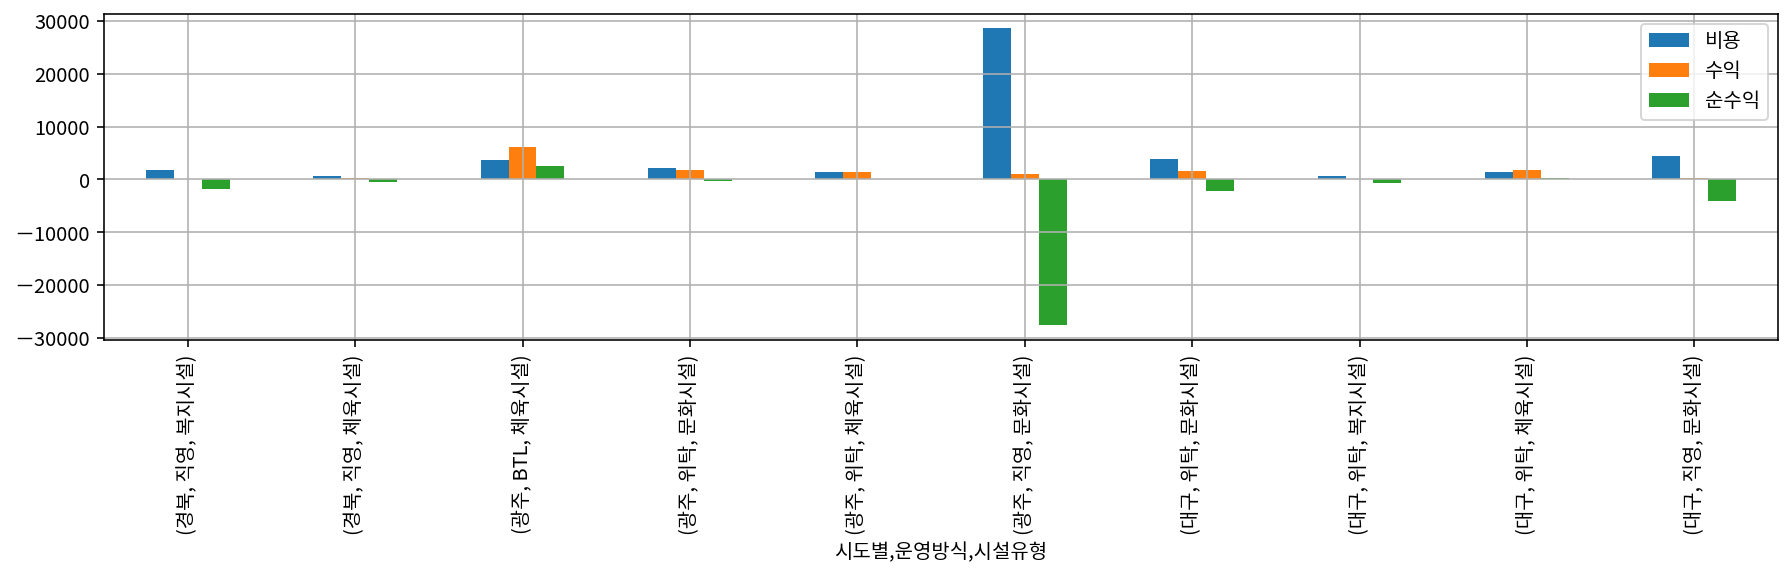

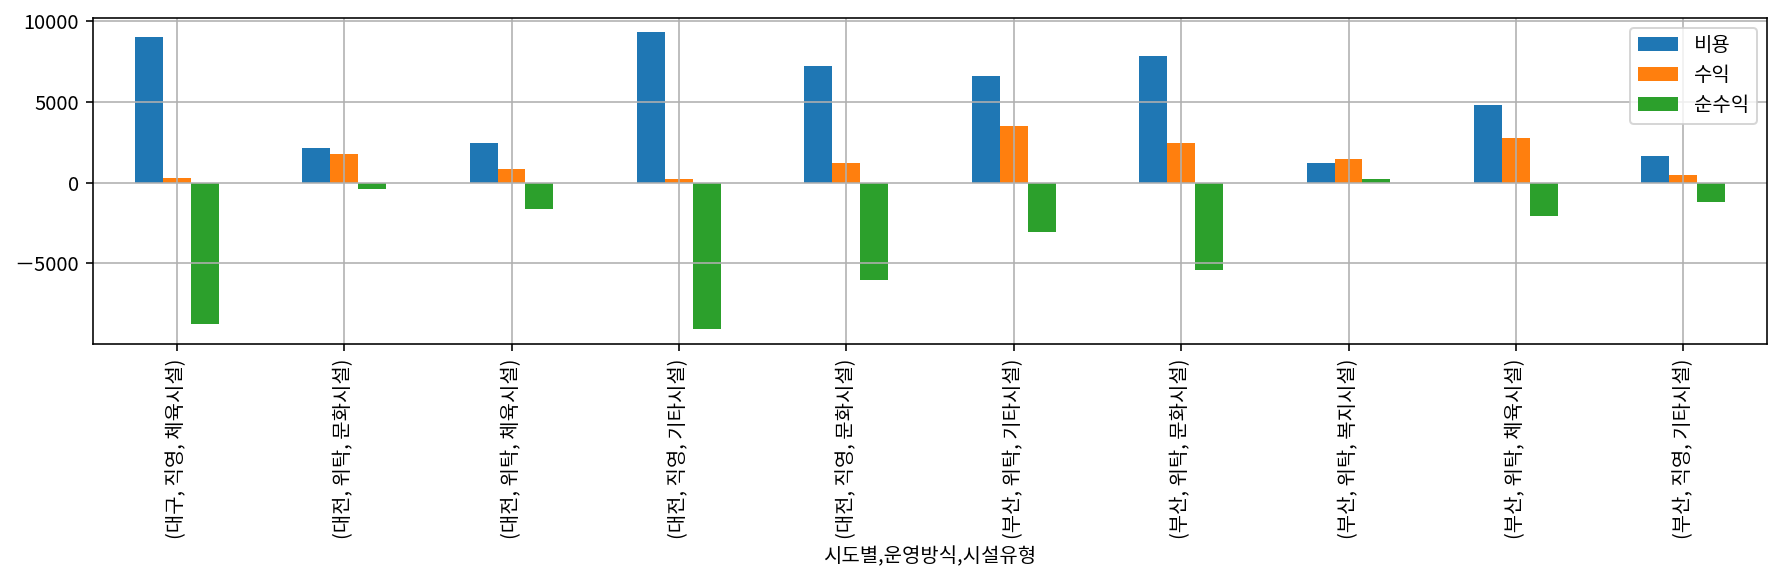

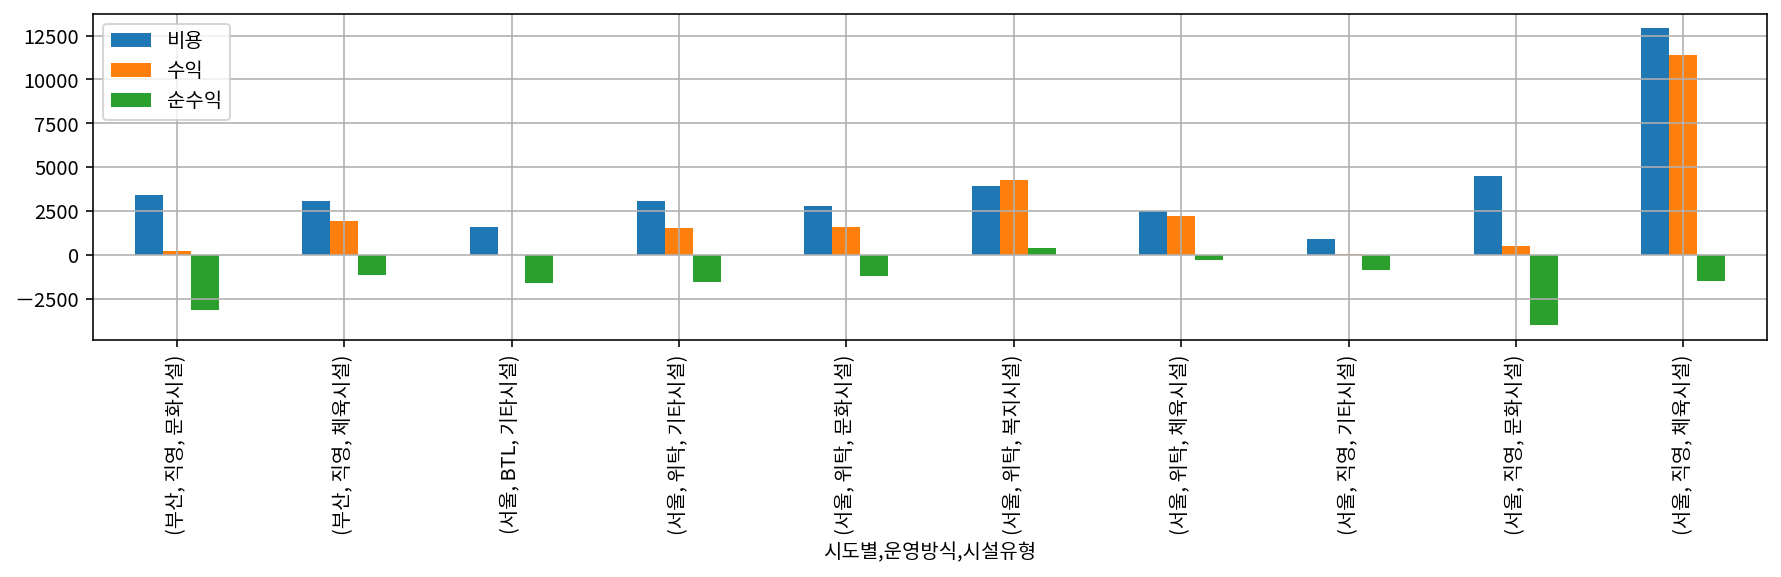

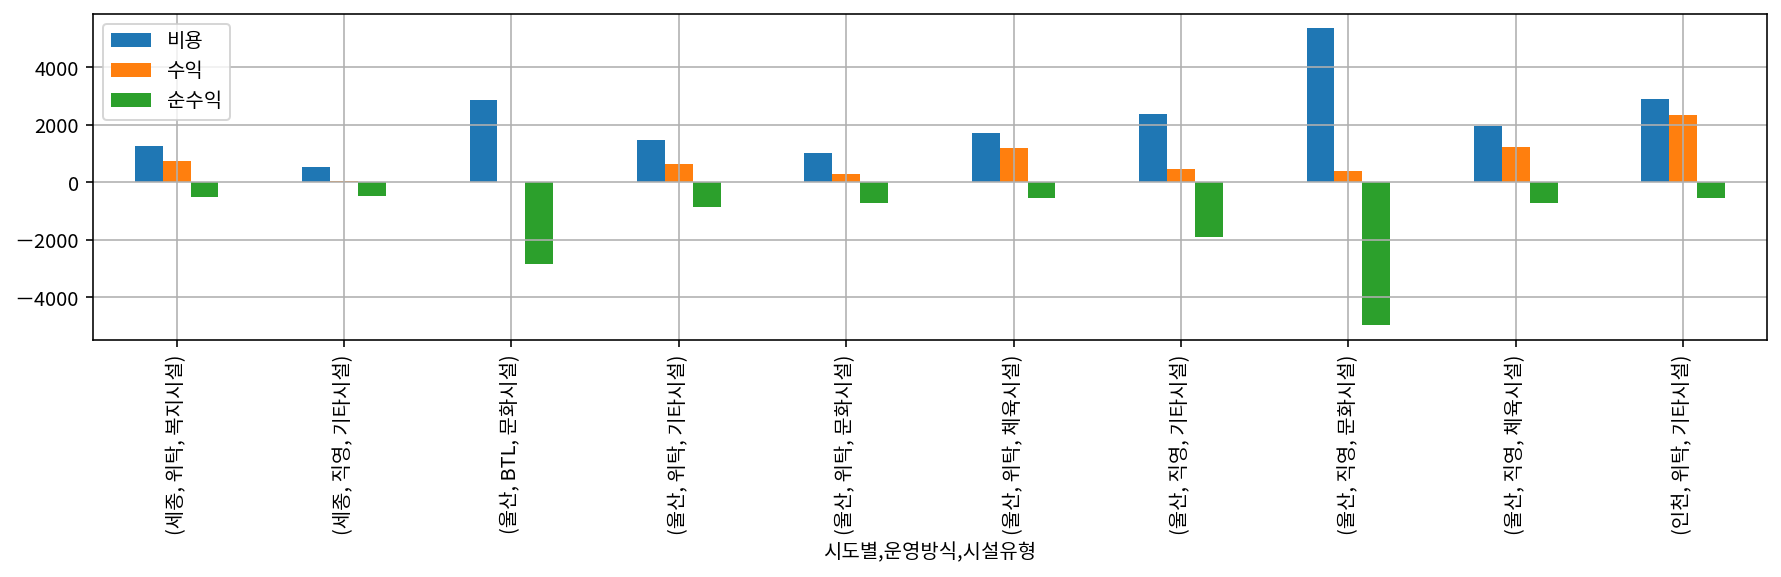

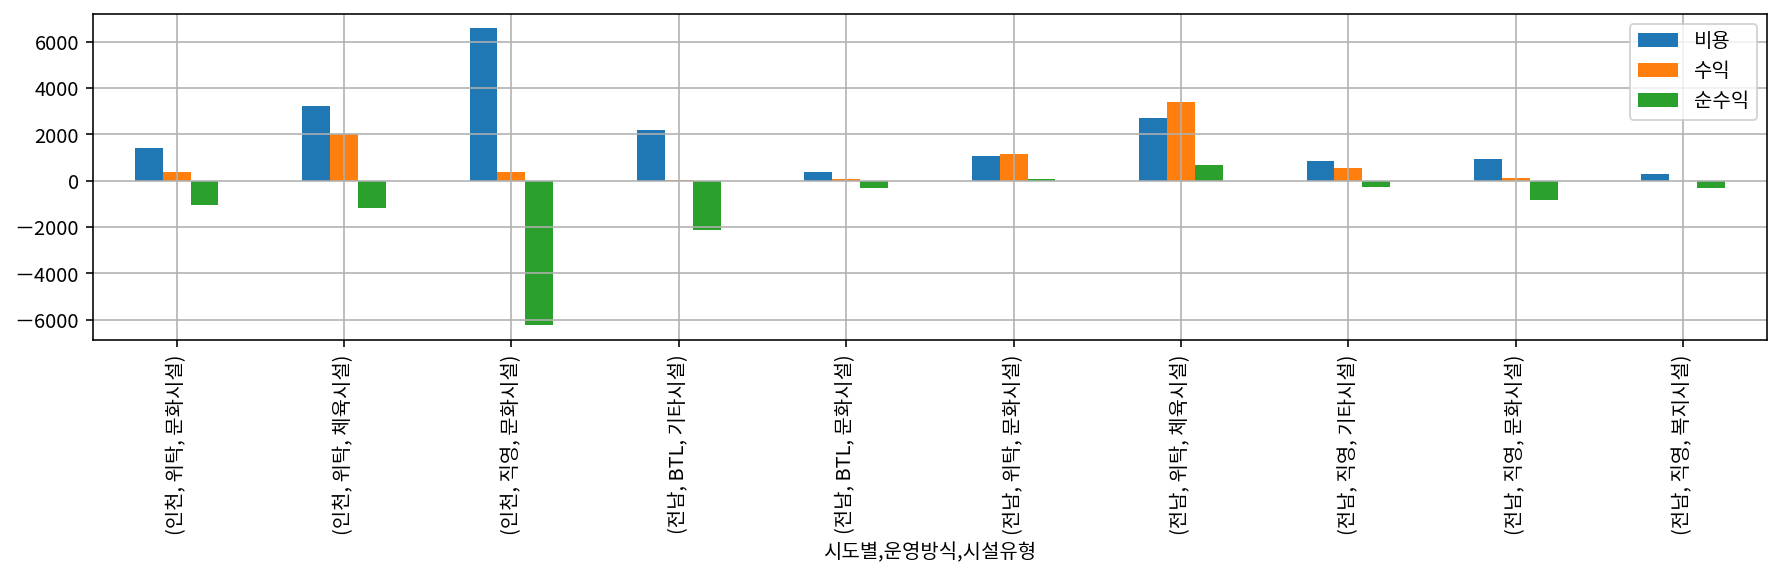

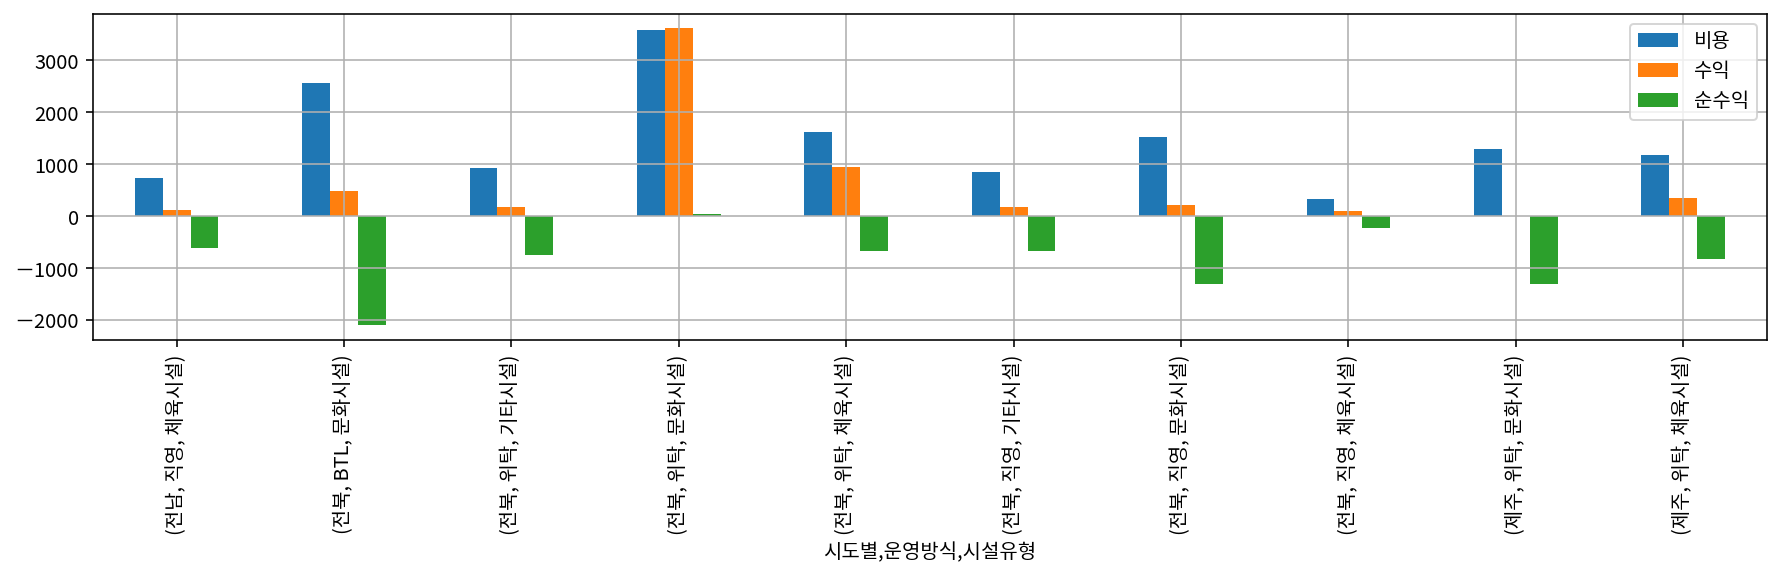

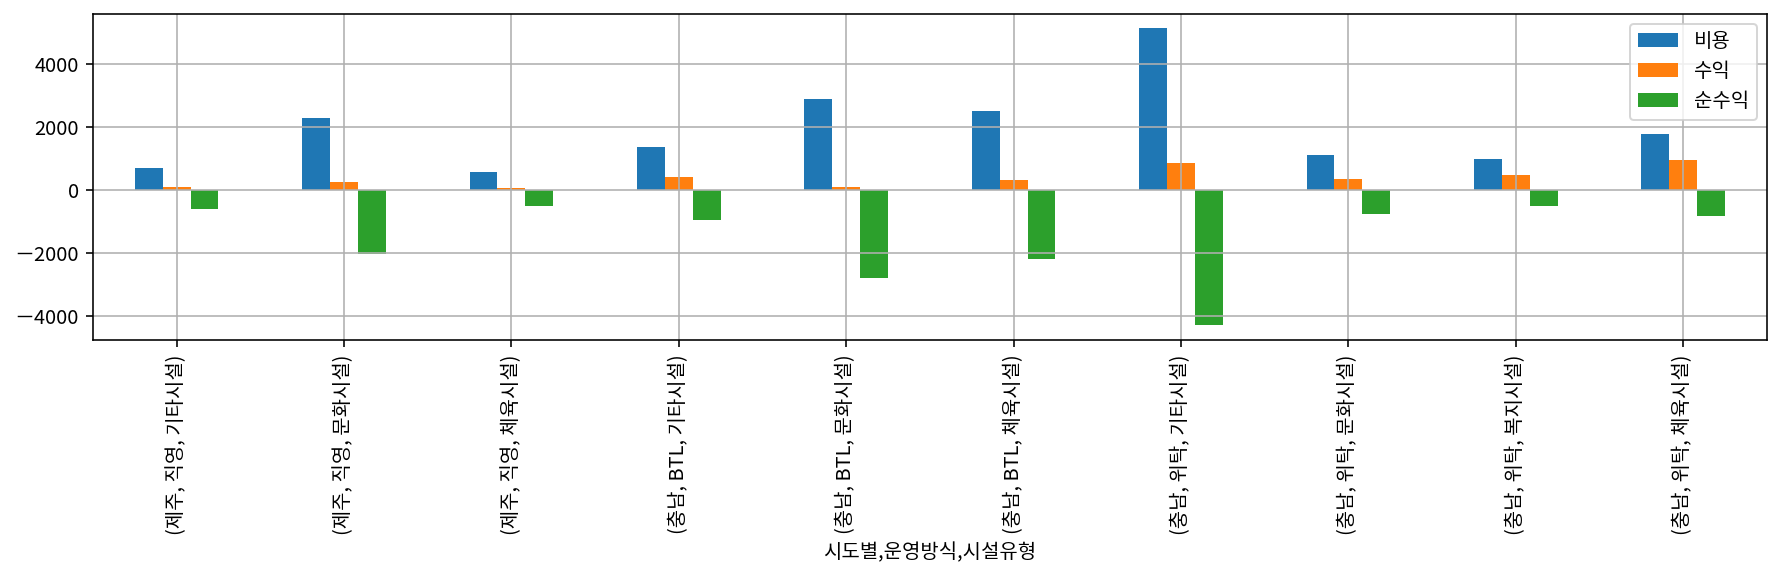

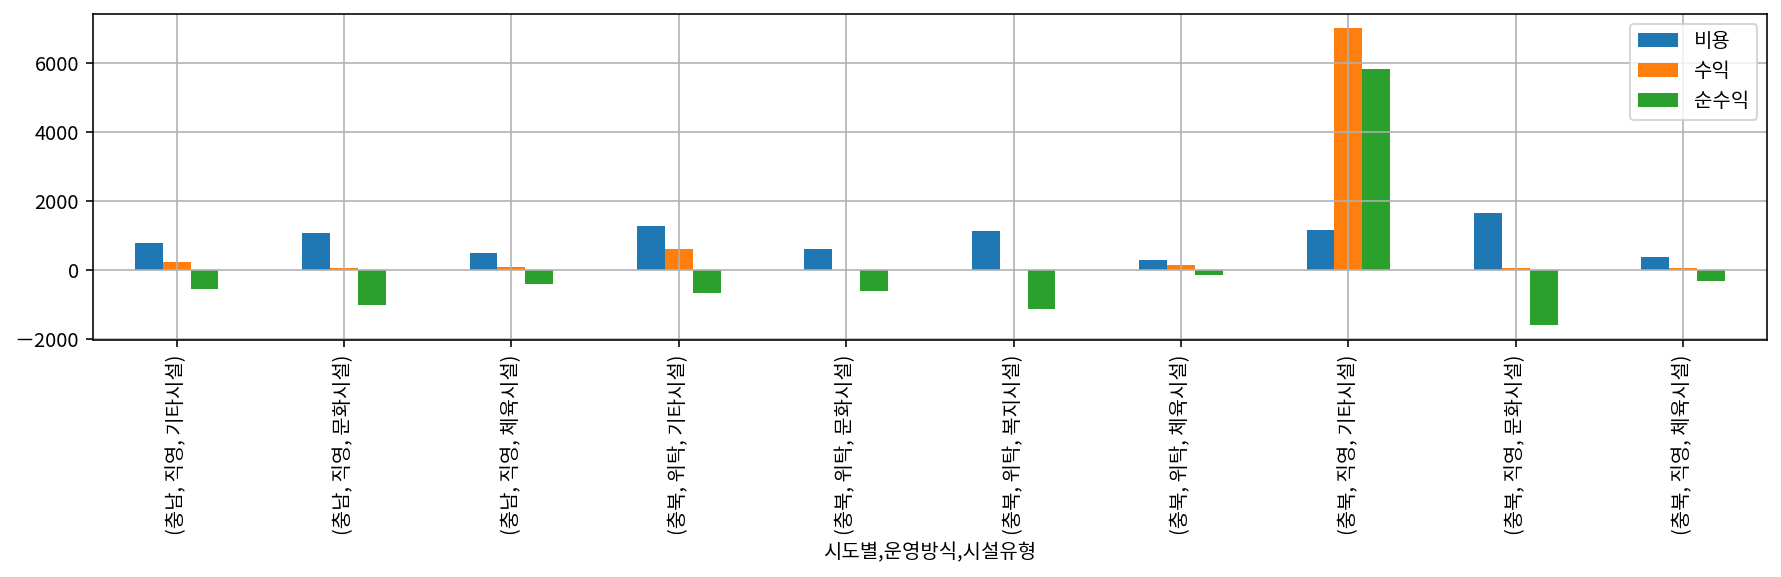

In [30]:
## 시설구분에 따라서, 경기 위탁 문화시설의 비용 수익이 높음, 경남 위탁 복지시설이 흑자,광주 직영 문화시설 적자, 대구 직영 체육, 대전 직영 기타 적자
# 전북 위탁 문화시설: 흑자,  충북 직영 기타 흑자
for i in range(0,110,10): 
    df.groupby(['시도별', '운영방식','시설유형']).mean()[['비용','수익','순수익']].iloc[i:i+10].plot.bar(figsize=(15,3), grid=True)

array([<AxesSubplot:title={'center':'관리인력'}, xlabel='시도별,시설유형'>,
       <AxesSubplot:title={'center':'연간이용인원'}, xlabel='시도별,시설유형'>],
      dtype=object)

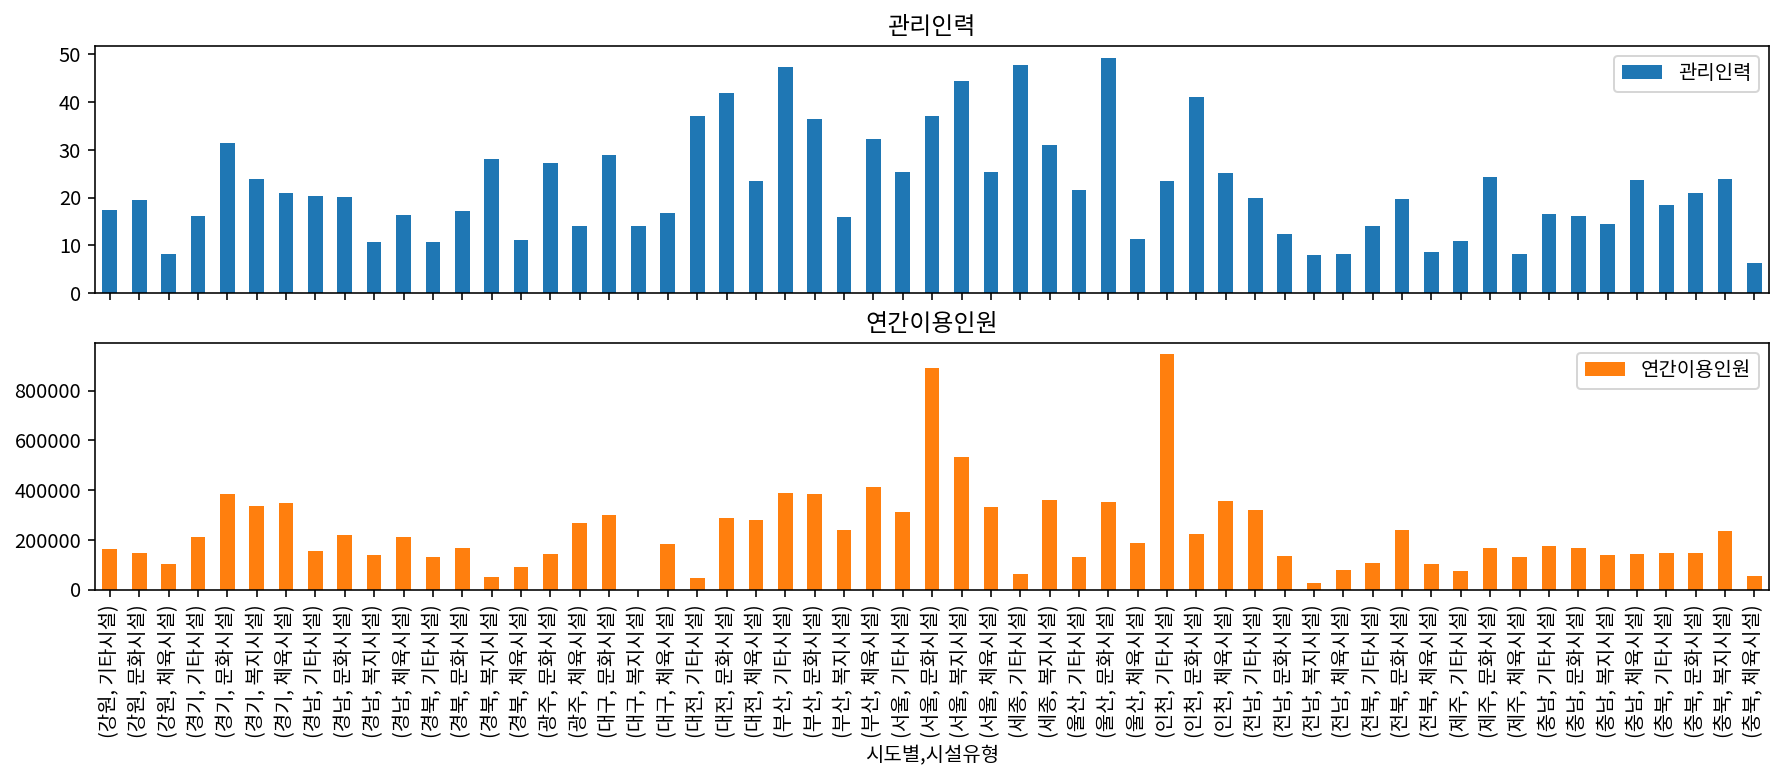

In [31]:
# 서울 문화시설, 인천 기타시설 연간이용인원 평균이 높음
# 관리 인력이 인천쪽이 적음

df.groupby(['시도별', '시설유형']).mean()[['관리인력','연간이용인원']].plot.bar(subplots=True,figsize=(15,5))

In [33]:
df[(df['시도별']=='광주') & (df['시설유형']=='문화시설')]

## 광주의 문제는 직영? 너무큰 면적? 관리비용 ? 지방이라는 이유?

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별
순번,,,,,,,,,,,,,,,,,,,,
176,광주본청,문화시설,문화예술회관,광주문화예술회관,1991-10-21,직영,47087,88422,64,210545,44776,44776,739,19908,24868,40,28611,1049,-27562,광주
177,광주본청,문화시설,문화예술회관,빛고을시민문화관,2010-02-02,위탁,20258,9346,20,114905,54311,54311,1241,12099,42212,40,2633,2710,77,광주
184,광주동구,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,4513,2887,25,254616,10550,8313,64,664,7649,40,1062,1067,5,광주
185,광주남구,문화시설,문화예술회관,종합문화예술회관,2003-08-28,위탁,10321,3723,0,0,14266,14266,360,5374,8892,40,2549,1672,-877,광주


In [34]:
df[(df['시도별']=='충북') & (df['운영방식']=='직영')].tail()

,자치단체,시설유형,시설구분,시설명,건립일,운영방식,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,건립비용,취득가액,감가상각액,감가상각 누계액,장부가액,내용연수,비용,수익,순수익,시도별
순번,,,,,,,,,,,,,,,,,,,,
520,충북음성군,문화시설,문화예술회관,음성문화예술회관,2008-05-19,직영,7289,15377,10,37469,22000,19458,486,5639,13819,40,1599,214,-1385,충북
521,충북음성군,체육시설,기타체육시설,감곡생활체육공원,2017-12-11,직영,1240,50051,2,23724,13929,13122,1444,3141,9981,40,174,4,-169,충북
522,충북음성군,체육시설,기타체육시설,금왕생활체육공원,2008-08-08,직영,1730,81623,3,86940,17463,17448,501,4296,13152,40,258,10,-248,충북
523,충북음성군,체육시설,기타체육시설,대소생활체육공원,2016-11-16,직영,414,33532,3,35904,12130,11442,1085,2267,9175,40,199,4,-196,충북
524,충북단양군,기타시설,기타시설,다누리센터,2012-06-28,직영,14436,9596,21,294607,32600,10271,131,1238,9033,40,1609,13812,12203,충북


In [35]:
def income_per_cost(d):
    if d['비용'] == 0:
        return None
    return d['수익']/d['비용']
df['비용대비수익']=df[['자치단체','시설유형','시설구분','운영방식','비용','수익']].apply(income_per_cost, axis=1)

In [36]:
df.sort_values(by='순수익', ascending=False)[(df['비용대비수익']>0)&(df['시설구분']=='문화예술회관')][['시도별','시설유형','시설구분','시설명','건립일','운영방식','비용','수익','순수익','비용대비수익']] # 94개 전체 863개

/Users/jmchoi/opt/anaconda3/envs/soprise/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
268,경기,문화시설,문화예술회관,고양아람누리,2007-02-13,위탁,10566,12272,1707,1.161461
129,대구,문화시설,문화예술회관,아양아트센터,2004-05-04,위탁,7965,9645,1680,1.210923
418,경기,문화시설,문화예술회관,하남문화예술회관,2007-05-10,위탁,7102,8581,1479,1.208251
255,경기,문화시설,문화예술회관,성남아트센터,2005-09-20,위탁,29173,30457,1283,1.044013
270,경기,문화시설,문화예술회관,고양어울림누리(어울림극장),2004-07-31,위탁,6802,7901,1099,1.161570
...,...,...,...,...,...,...,...,...,...,...
758,경남,문화시설,문화예술회관,성산아트홀,2000-04-25,위탁,12033,2134,-9899,0.177346
190,대전,문화시설,문화예술회관,대전예술의전당,2003-10-01,직영,12290,2362,-9928,0.192189
203,울산,문화시설,문화예술회관,울산문화예술회관,1995-07-10,직영,18637,1289,-17348,0.069163


In [37]:
surplus_df = df.sort_values(by='비용대비수익', ascending=False)[(df['비용대비수익']<10)&(df['비용대비수익']>1)][['시도별','시설유형','시설구분','시설명','건립일','운영방식','비용','수익','순수익','비용대비수익']]
surplus_df

/Users/jmchoi/opt/anaconda3/envs/soprise/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
524,충북,기타시설,기타시설,다누리센터,2012-06-28,직영,1609,13812,12203,8.584214
125,대구,체육시설,축구장,DGB대구은행파크,2019-01-24,위탁,866,5265,4399,6.079677
317,경기,기타시설,기타시설,와부체육문화센터,2010-08-16,위탁,391,1619,1228,4.140665
196,대전,체육시설,수영장,용운국제수영장,2009-08-31,위탁,688,2337,1649,3.396802
198,대전,체육시설,체육관,동구 국민체육센터,2014-04-01,위탁,19,54,35,2.842105
...,...,...,...,...,...,...,...,...,...,...
20,서울,복지시설,종합사회복지관,갈월종합사회복지관,2001-09-01,위탁,2805,2820,16,1.005348
184,광주,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,1062,1067,5,1.004708
567,충남,복지시설,종합사회복지관,당진시종합복지타운,2012-08-03,위탁,713,715,2,1.002805


In [38]:
len(surplus_df)/len(df) * 100

10.544611819235227

In [39]:
deficit_df = df.sort_values(by='비용대비수익', ascending=False)[(df['비용대비수익']>0)&(df['비용대비수익']<1)].sort_values(by='비용대비수익')[['시도별','시설유형','시설구분','시설명','건립일','운영방식','비용','수익','순수익','비용대비수익']]
deficit_df

/Users/jmchoi/opt/anaconda3/envs/soprise/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
494,충북,문화시설,공립도서관,청주시립도서관,2013-01-25,직영,6077,2,-6075,0.000329
80,부산,문화시설,박물관,복천박물관,1996-02-26,직영,2274,2,-2271,0.000880
322,경기,문화시설,공립도서관,화성시립남양도서관,2017-09-30,직영,1041,1,-1041,0.000961
495,충북,문화시설,박물관,청주고인쇄박물관,1992-03-17,직영,2840,3,-2837,0.001056
353,경기,문화시설,공립도서관,의정부과학도서관,2007-04-30,직영,3292,4,-3288,0.001215
...,...,...,...,...,...,...,...,...,...,...
468,강원,기타시설,기타시설,삼척해상케이블카,2017-09-20,직영,2961,2888,-72,0.975346
13,서울,문화시설,문화예술회관,충무아트센터,2005-02-04,위탁,8910,8697,-213,0.976094
297,경기,문화시설,문화예술회관,안산문화예술의전당,2004-06-17,위탁,14957,14609,-348,0.976733


#### 위탁 부분 분석 문화예술회관

In [40]:
surplus_df[(surplus_df['시도별']=='경기')&(surplus_df['시설구분']=='문화예술회관')]

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
418,경기,문화시설,문화예술회관,하남문화예술회관,2007-05-10,위탁,7102,8581,1479,1.208251
269,경기,문화시설,문화예술회관,고양어울림누리(별따기배움터),2004-07-31,위탁,2233,2594,361,1.161666
270,경기,문화시설,문화예술회관,고양어울림누리(어울림극장),2004-07-31,위탁,6802,7901,1099,1.161570
268,경기,문화시설,문화예술회관,고양아람누리,2007-02-13,위탁,10566,12272,1707,1.161461
356,경기,문화시설,문화예술회관,의정부예술의전당,2001-04-06,위탁,8460,8910,450,1.053191
255,경기,문화시설,문화예술회관,성남아트센터,2005-09-20,위탁,29173,30457,1283,1.044013


In [41]:
deficit_df[(deficit_df['시도별']=='경기')&(deficit_df['시설구분']=='문화예술회관')&(deficit_df['운영방식']=='위탁')]

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
373,경기,문화시설,문화예술회관,김포아트홀,2014-04-01,위탁,9695,192,-9503,0.019804
348,경기,문화시설,문화예술회관,한국소리터,2011-09-01,위탁,597,18,-579,0.030151
437,경기,문화시설,문화예술회관,가평군문화예술회관,1998-07-11,위탁,365,39,-326,0.106849
439,경기,문화시설,문화예술회관,연천수레울아트홀,2011-03-18,위탁,1300,159,-1141,0.122308
398,경기,문화시설,문화예술회관,오산문화예술회관,2004-04-23,위탁,2145,339,-1806,0.158042
412,경기,문화시설,문화예술회관,포천반월아트홀,2003-10-18,위탁,1343,297,-1046,0.221147
242,경기,문화시설,문화예술회관,장안종합구민회관,2006-03-08,위탁,4426,2846,-1580,0.643019
430,경기,문화시설,문화예술회관,과천시민회관,1995-08-23,위탁,16747,11041,-5705,0.659282
377,경기,문화시설,문화예술회관,군포시문화예술회관,1998-04-23,위탁,6405,5393,-1012,0.841998


In [42]:
df[(df['시도별']=='경기')&(df['시설구분']=='문화예술회관')&(df['운영방식']=='위탁')][['시도별','시설유형','시설구분','시설명','건립일','건물면적(㎡)','토지면적(㎡)','관리인력','연간이용인원','운영방식','비용','수익','순수익','비용대비수익']]

,시도별,시설유형,시설구분,시설명,건립일,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,,,,,
242,경기,문화시설,문화예술회관,장안종합구민회관,2006-03-08,14806,31405,47,1427416,위탁,4426,2846,-1580,0.643019
255,경기,문화시설,문화예술회관,성남아트센터,2005-09-20,47949,133858,149,384824,위탁,29173,30457,1283,1.044013
268,경기,문화시설,문화예술회관,고양아람누리,2007-02-13,56351,54239,19,220892,위탁,10566,12272,1707,1.161461
269,경기,문화시설,문화예술회관,고양어울림누리(별따기배움터),2004-07-31,8912,6276,41,54109,위탁,2233,2594,361,1.161666
270,경기,문화시설,문화예술회관,고양어울림누리(어울림극장),2004-07-31,8421,12897,19,150570,위탁,6802,7901,1099,1.161570
297,경기,문화시설,문화예술회관,안산문화예술의전당,2004-06-17,44864,78484,54,1178212,위탁,14957,14609,-348,0.976733
302,경기,문화시설,문화예술회관,안양아트센터,1989-12-05,15609,11909,56,122292,위탁,14814,13294,-1520,0.897394
348,경기,문화시설,문화예술회관,한국소리터,2011-09-01,7275,27183,4,76000,위탁,597,18,-579,0.030151
356,경기,문화시설,문화예술회관,의정부예술의전당,2001-04-06,22372,40273,53,279613,위탁,8460,8910,450,1.053191


### 체육시설

In [43]:
# 축구 야구 체육관
surplus_df[(surplus_df['시설유형']=='체육시설')].sort_values(by='순수익', ascending=False)

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
125,대구,체육시설,축구장,DGB대구은행파크,2019-01-24,위탁,866,5265,4399,6.079677
158,인천,체육시설,기타체육시설,문학경기장(야구장포함),2002-02-25,위탁,7897,11004,3108,1.393441
179,광주,체육시설,야구장,광주기아챔피언스필드,2014-02-28,BTL,3613,6217,2604,1.720731
196,대전,체육시설,수영장,용운국제수영장,2009-08-31,위탁,688,2337,1649,3.396802
204,울산,체육시설,축구장,문수축구경기장,2001-06-30,위탁,3182,3964,782,1.245757
624,전남,체육시설,축구장,목포국제축구센터,2009-08-10,위탁,2708,3379,671,1.247784
64,서울,체육시설,기타체육시설,동작구민체육센터,2002-05-10,위탁,4077,4705,628,1.154035
14,서울,체육시설,체육관,충무아트홀 스포츠센터,2005-02-04,위탁,4040,4592,552,1.136634
597,전북,체육시설,기타체육시설,군산월명체육관,1991-09-20,직영,398,778,380,1.954774


In [44]:
# 아쉬운 육상경기장의 순수익 > 정부차원에서의 지원이 필요
deficit_df[(deficit_df['시설유형']=='체육시설')].sort_values(by='순수익', ascending=True).head(30)

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
124,대구,체육시설,육상경기장,대구육상진흥센터,2013-12-03,직영,20510,110,-20400,0.005363
168,인천,체육시설,수영장,미추홀구 국민체육센터,2018-08-01,위탁,6901,786,-6115,0.113897
664,전남,체육시설,육상경기장,영광스포티움,2007-10-30,직영,6162,374,-5789,0.060695
123,대구,체육시설,육상경기장,대구스타디움,2001-06-28,직영,6180,406,-5774,0.065696
260,경기,체육시설,육상경기장,성남종합운동장,1986-09-01,위탁,9519,4134,-5385,0.434289
273,경기,체육시설,수영장,고양어울림누리(꽃우물수영장),2005-08-31,위탁,9718,4349,-5369,0.447520
193,대전,체육시설,육상경기장,한밭종합운동장,1964-01-01,위탁,6987,1641,-5345,0.234865
194,대전,체육시설,축구장,덕암축구센터,2014-12-19,위탁,4586,39,-4546,0.008504
765,경남,체육시설,싸이클경기장,창원자전거(경륜)경기장,1997-09-30,위탁,27085,23696,-3390,0.874875


In [45]:
df[(df['시설구분']=='싸이클경기장')].sort_values(by='순수익', ascending=False)[['시도별','시설유형','시설구분','시설명','건립일','건물면적(㎡)','토지면적(㎡)','관리인력','연간이용인원','운영방식','비용','수익','순수익','비용대비수익']]

,시도별,시설유형,시설구분,시설명,건립일,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,,,,,
490,강원,체육시설,싸이클경기장,양양싸이클경기장,2012-05-30,4015,104991,2,10112,직영,496,5,-492,0.010081
86,부산,체육시설,싸이클경기장,금정체육공원,2002-07-31,36542,19769,82,337101,위탁,22356,21409,-947,0.957640
765,경남,체육시설,싸이클경기장,창원자전거(경륜)경기장,1997-09-30,42339,52880,328,483232,위탁,27085,23696,-3390,0.874875


In [46]:
df[(df['시설구분']=='박물관')&(df['비용대비수익']>1) ].sort_values(by='비용대비수익')[['시도별','시설유형','시설구분','시설명','건립일','건물면적(㎡)','토지면적(㎡)','관리인력','연간이용인원','운영방식','비용','수익','순수익','비용대비수익']]

,시도별,시설유형,시설구분,시설명,건립일,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,,,,,
267,경기,문화시설,박물관,고양어린이박물관,2016-03-24,8492,8232,16,257026,위탁,6185,6373,187,1.030396
301,경기,문화시설,박물관,김중업건축박물관,2014-03-28,4596,16243,9,124928,위탁,1490,1835,345,1.231544
620,전남,문화시설,박물관,김대중노벨평화상기념관,2013-06-15,4677,15606,11,298350,위탁,1038,1313,275,1.264933
725,경북,문화시설,박물관,에코랄라,2018-09-01,18486,1032818,21,180000,위탁,10,1663,1653,166.300000


In [47]:
df[(df['시설구분']=='박물관')&(df['비용대비수익']>0.1)&(df['비용대비수익']<1) ].sort_values(by='비용대비수익')[['시도별','시설유형','시설구분','시설명','건립일','건물면적(㎡)','토지면적(㎡)','관리인력','연간이용인원','운영방식','비용','수익','순수익','비용대비수익']]

,시도별,시설유형,시설구분,시설명,건립일,건물면적(㎡),토지면적(㎡),관리인력,연간이용인원,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,,,,,
232,경기,문화시설,박물관,전곡선사박물관,2011-04-25,5395,56319,25,200784,위탁,1685,173,-1511,0.102671
239,경기,문화시설,박물관,수원박물관,2008-10-01,7118,39885,34,115242,직영,2408,255,-2153,0.105897
55,서울,문화시설,박물관,허준박물관,2004-11-20,3934,5693,10,72888,위탁,658,73,-585,0.110942
117,대구,문화시설,박물관,DTC섬유박물관,2015-05-29,49667,13732,6,72855,위탁,1090,154,-936,0.141284
601,전북,문화시설,박물관,보석박물관,2002-05-22,13227,141990,15,211710,직영,1790,259,-1531,0.144693
742,경북,문화시설,박물관,호국평화기념관,2015-10-15,9461,232020,38,162265,직영,1076,179,-898,0.166357
678,경북,문화시설,박물관,새천년기념관,2009-10-04,5101,5447,8,58717,직영,376,63,-314,0.167553
570,충남,문화시설,박물관,정림사지박물관,2006-09-29,3691,61499,7,159072,위탁,498,111,-386,0.222892
40,서울,문화시설,박물관,둘리뮤지엄,2015-04-30,4151,5600,18,83483,위탁,1143,268,-875,0.234471


In [48]:
surplus_df[(surplus_df['시도별']=='광주')&(surplus_df['시설구분']=='문화예술회관')]

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
177,광주,문화시설,문화예술회관,빛고을시민문화관,2010-02-02,위탁,2633,2710,77,1.029244
184,광주,문화시설,문화예술회관,광주동구문화센터,2009-06-29,위탁,1062,1067,5,1.004708


In [49]:
deficit_df[(deficit_df['시도별']=='광주')&(deficit_df['시설구분']=='문화예술회관')]

,시도별,시설유형,시설구분,시설명,건립일,운영방식,비용,수익,순수익,비용대비수익
순번,,,,,,,,,,
176,광주,문화시설,문화예술회관,광주문화예술회관,1991-10-21,직영,28611,1049,-27562,0.036664
185,광주,문화시설,문화예술회관,종합문화예술회관,2003-08-28,위탁,2549,1672,-877,0.655944
